<a href="https://colab.research.google.com/github/francisco-roserojaramillo/alura-store-latam/blob/main/AluraStoreLatam_challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de Datos de Alura Store para Decisión de Venta

**Realizado por:** Francisco Xavier Rosero Jaramillo - Estudiante en Data Science

### Importación de datos
El primer paso consiste en la importación de las librerías necesarias para el análisis y la carga de los conjuntos de datos de las cuatro tiendas. A cada conjunto de datos se le asignará una etiqueta para identificar la tienda de origen antes de consolidarlos en un único DataFrame para un análisis integral.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Configuración de estilo visual para los gráficos
sns.set_theme(style="whitegrid")

# URLs de los archivos de datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Carga de los datos en DataFrames de pandas
tienda1_df = pd.read_csv(url1)
tienda2_df = pd.read_csv(url2)
tienda3_df = pd.read_csv(url3)
tienda4_df = pd.read_csv(url4)

# Añadir una columna para identificar cada tienda
tienda1_df['Tienda'] = 'Tienda 1'
tienda2_df['Tienda'] = 'Tienda 2'
tienda3_df['Tienda'] = 'Tienda 3'
tienda4_df['Tienda'] = 'Tienda 4'

# Consolidar todos los datos en un único DataFrame
df_consolidado = pd.concat([tienda1_df, tienda2_df, tienda3_df, tienda4_df], ignore_index=True)

print("Se han cargado y consolidado los datos de las 4 tiendas.")
print(f"El DataFrame consolidado tiene {df_consolidado.shape[0]} filas y {df_consolidado.shape[1]} columnas.")
print("\nVisualización de los primeros registros del DataFrame consolidado:")
df_consolidado.head()

Se han cargado y consolidado los datos de las 4 tiendas.
El DataFrame consolidado tiene 9435 filas y 13 columnas.

Visualización de los primeros registros del DataFrame consolidado:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


# 1. Análisis de facturación
Para evaluar la eficiencia de cada tienda, el primer indicador clave es el ingreso total. Se calculará la suma de los precios de todos los productos vendidos por cada tienda y se presentará una comparativa visual para identificar rápidamente las diferencias en el rendimiento financiero.

/tmp/ipython-input-3181548874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ingresos_por_tienda.index, y=ingresos_por_tienda.values, palette='viridis', order=ingresos_por_tienda.index)


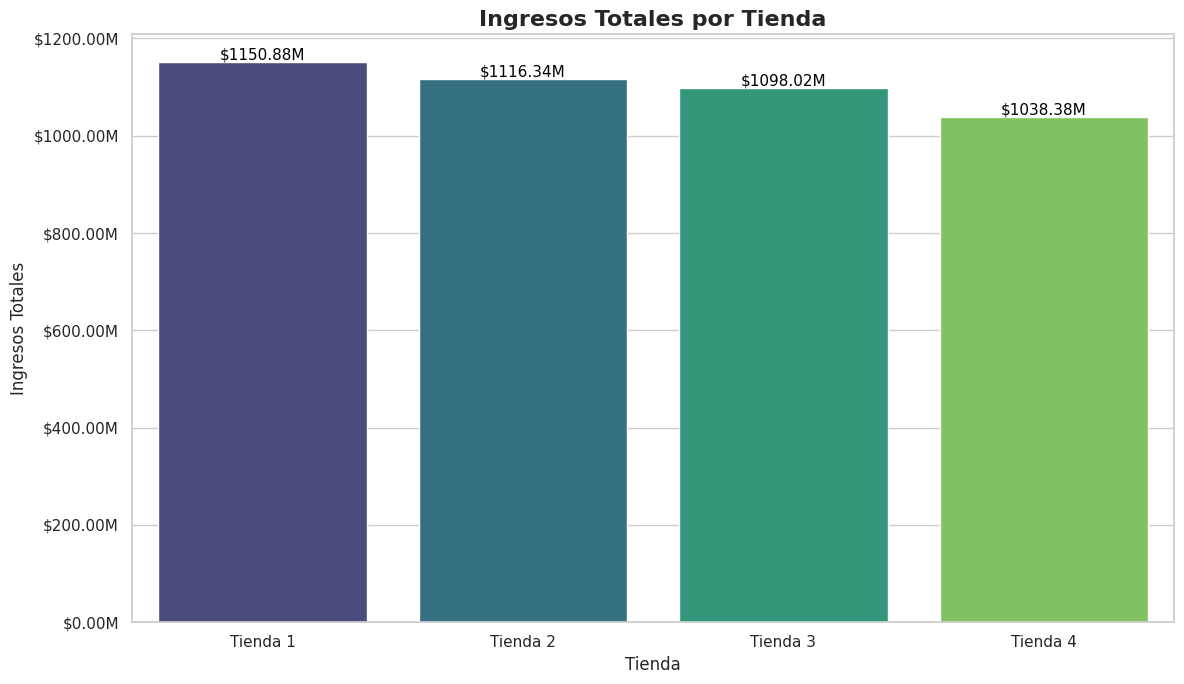

In [ ]:
# Calcular los ingresos totales por tienda
ingresos_por_tienda = df_consolidado.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=ingresos_por_tienda.index, y=ingresos_por_tienda.values, palette='viridis', order=ingresos_por_tienda.index)

# Añadir títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)

# Formatear el eje Y para mostrar los valores en millones
formatter = mticker.FuncFormatter(lambda x, p: f'${x/1_000_000:.2f}M')
ax.yaxis.set_major_formatter(formatter)

# Añadir etiquetas de valor en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x/1_000_000:.2f}M', label_type='edge', fontsize=11, color='black')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría
Comprender qué categorías de productos son las más populares en cada tienda es fundamental. Se analizará el volumen de ventas por categoría para cada una de las tiendas, lo que permitirá identificar las preferencias de los clientes y las posibles fortalezas o debilidades en el catálogo de productos de cada sucursal.

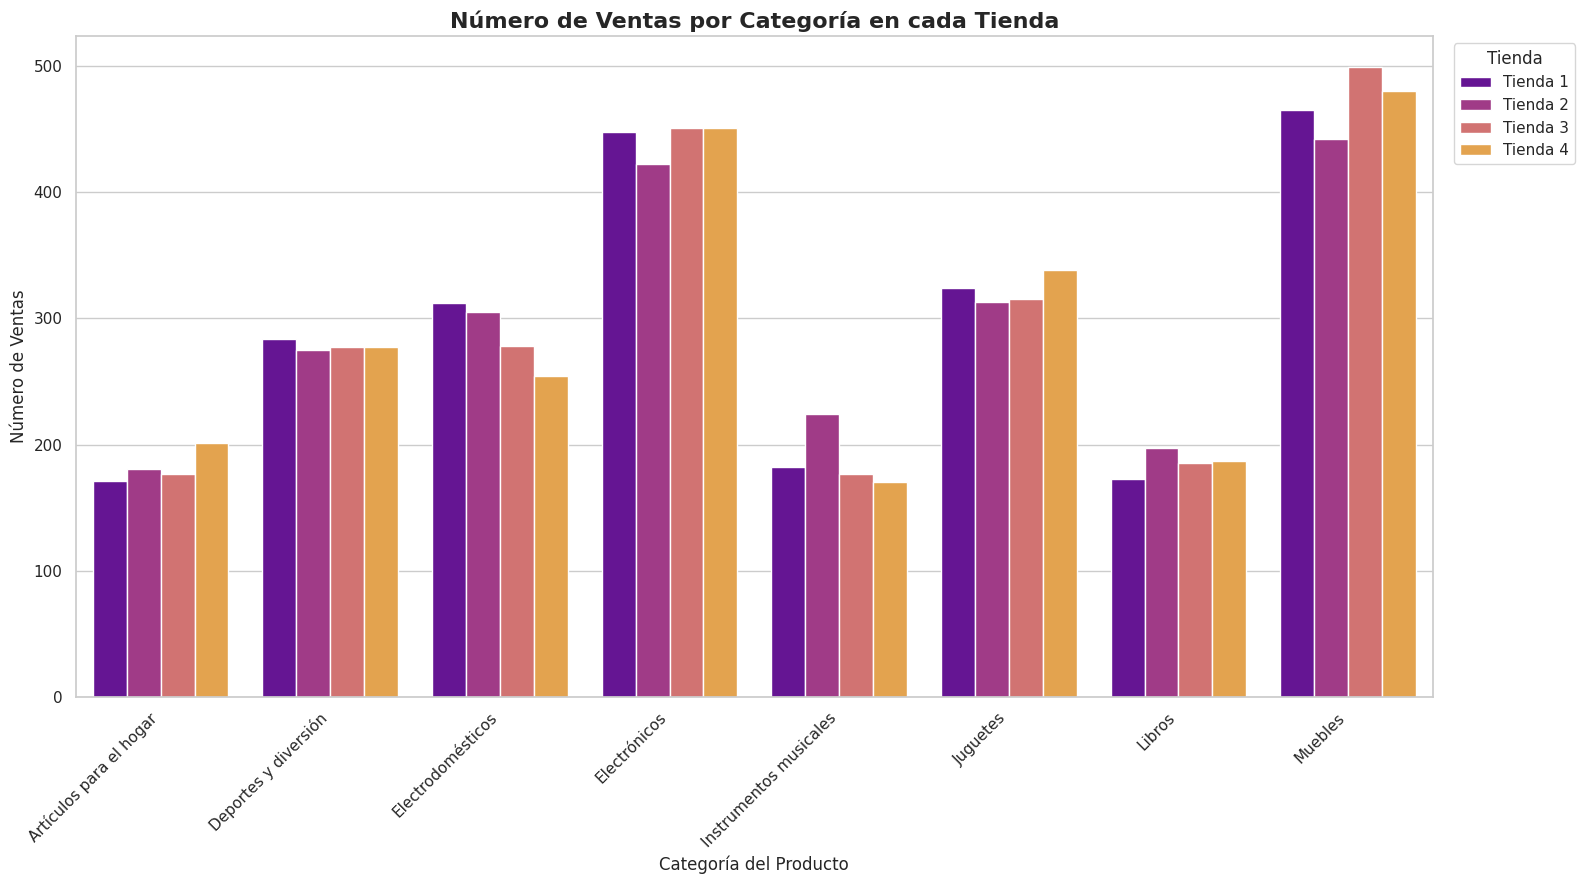

In [ ]:
# Calcular el número de ventas por categoría y tienda
ventas_categoria = df_consolidado.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Numero de Ventas')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(16, 9))
sns.barplot(x='Categoría del Producto', y='Numero de Ventas', hue='Tienda', data=ventas_categoria, palette='plasma')

# Añadir títulos y etiquetas
plt.title('Número de Ventas por Categoría en cada Tienda', fontsize=16, weight='bold')
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda
La satisfacción del cliente es un indicador crítico del éxito a largo plazo. Se calculará la calificación promedio otorgada por los clientes a cada tienda. Este análisis nos dará una visión clara de la percepción del cliente y la calidad del servicio en cada ubicación.

/tmp/ipython-input-2479130386.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Calificación', data=calificacion_promedio, palette='magma', order=calificacion_promedio['Tienda'])


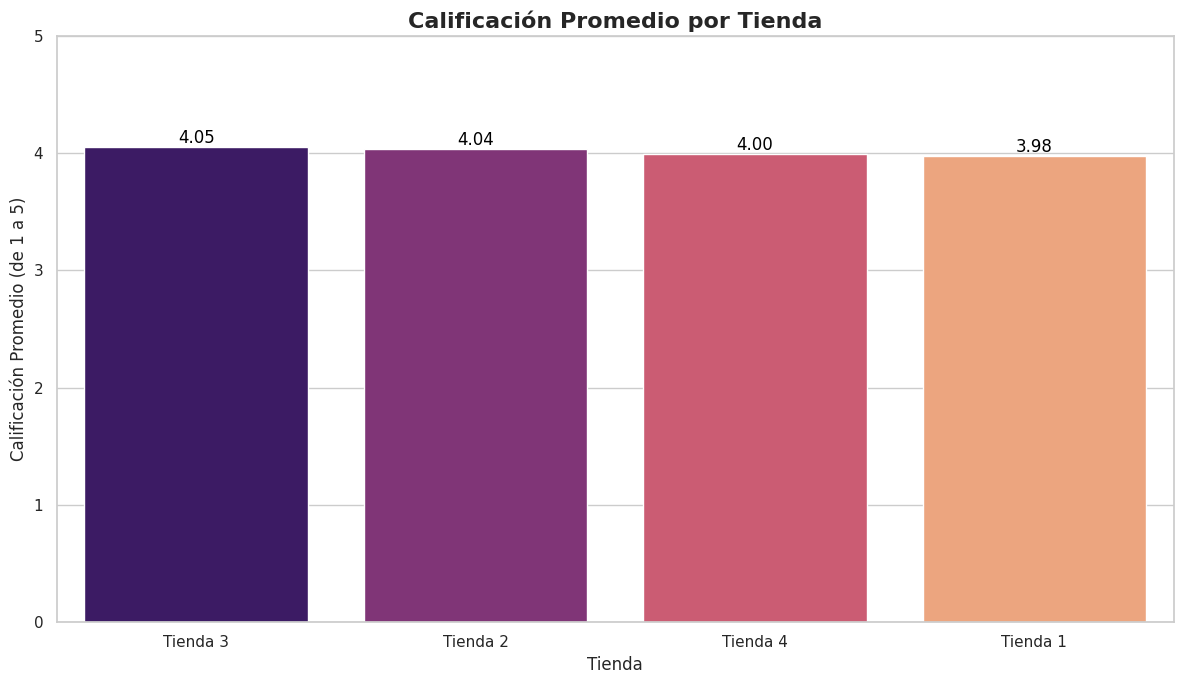

In [ ]:
# Calcular la calificación promedio por tienda
calificacion_promedio = df_consolidado.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Tienda', y='Calificación', data=calificacion_promedio, palette='magma', order=calificacion_promedio['Tienda'])

# Añadir títulos y etiquetas
plt.title('Calificación Promedio por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio (de 1 a 5)', fontsize=12)
plt.ylim(0, 5)

# Añadir etiquetas de valor en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos
Identificar los productos estrella y aquellos con menor rotación es clave para la gestión de inventario y estrategias de marketing. Se analizarán los 5 productos más vendidos y los 5 menos vendidos para cada una de las cuatro tiendas, proporcionando una visión detallada a nivel de producto.

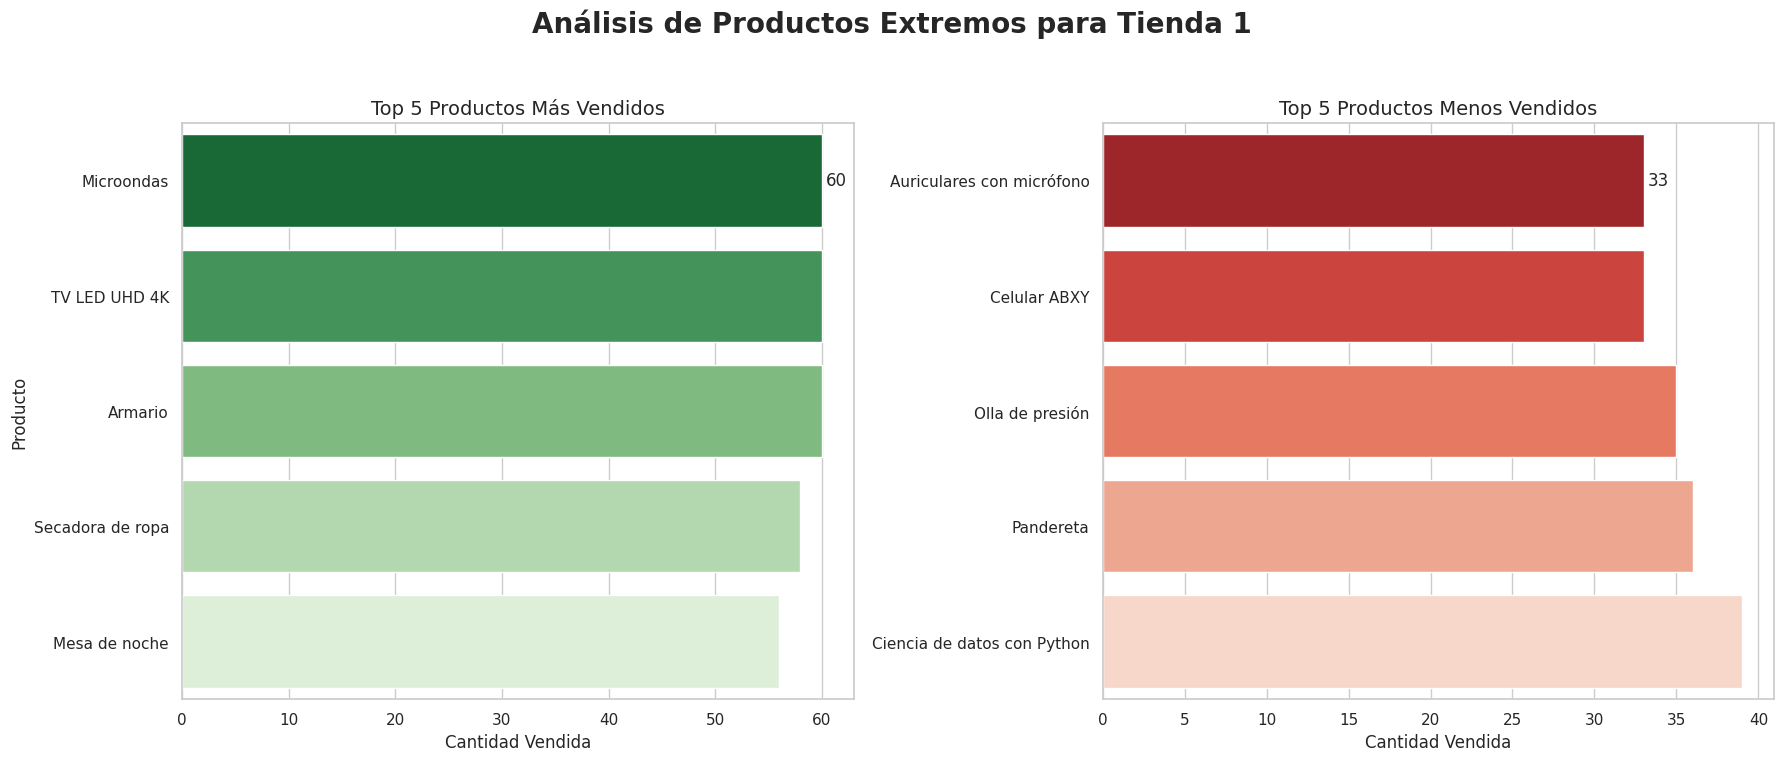

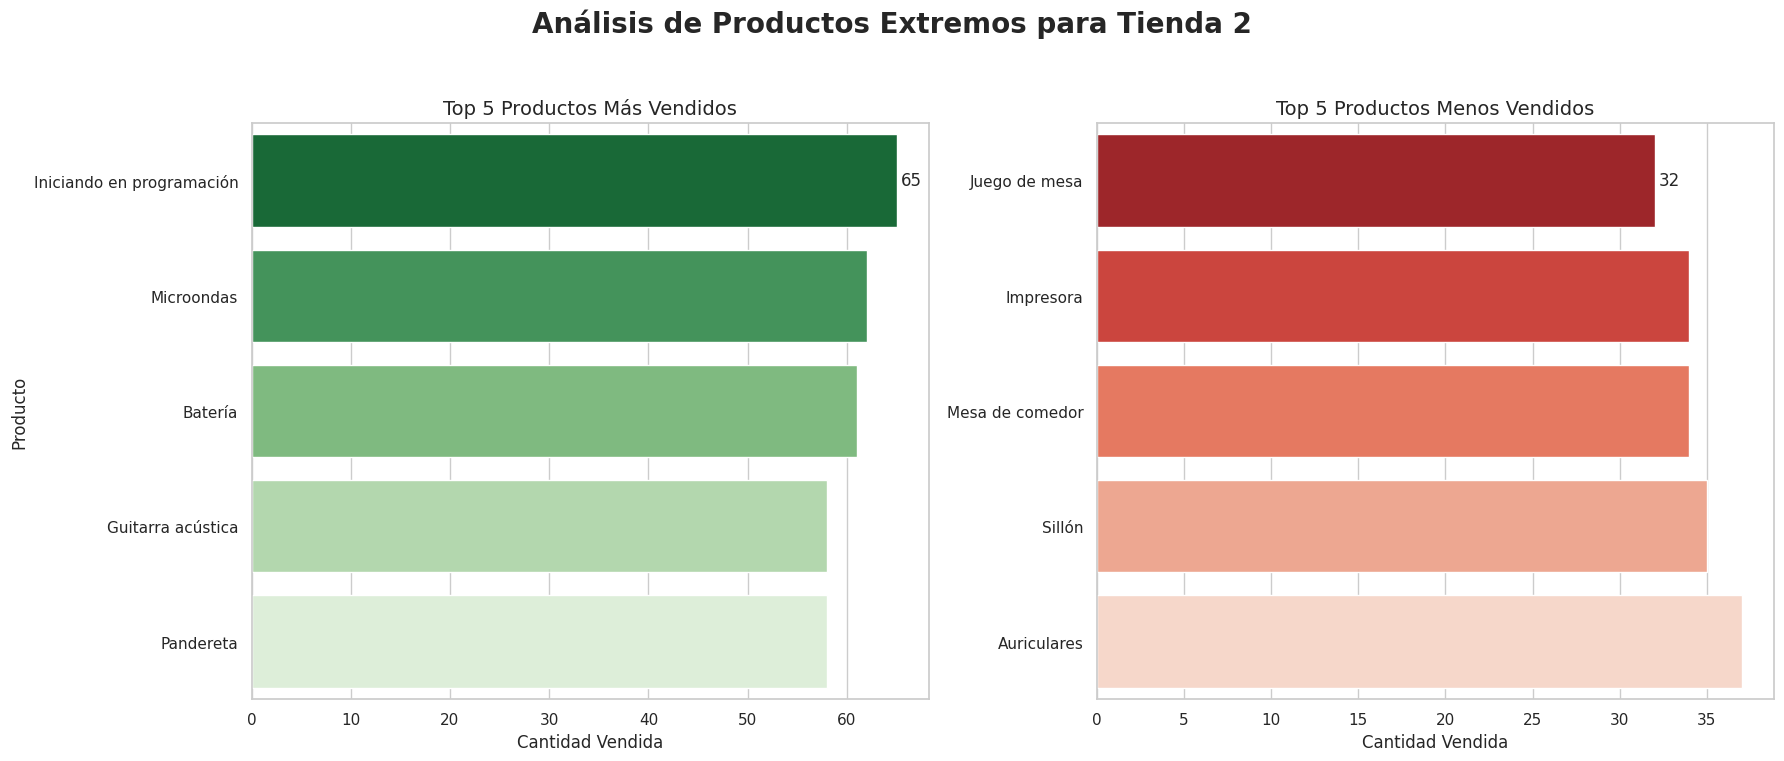

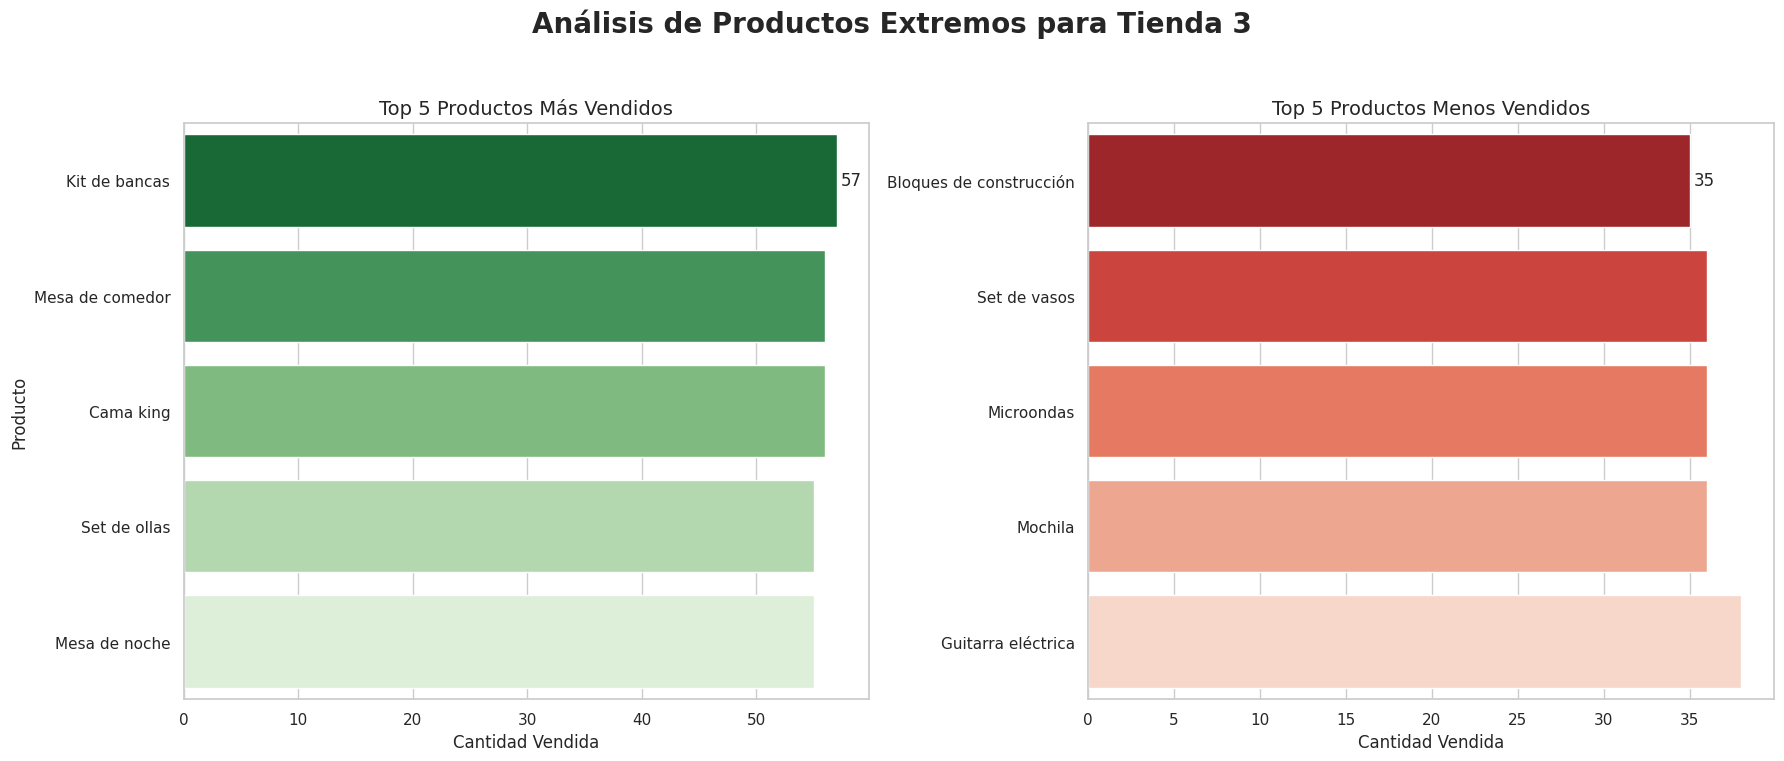

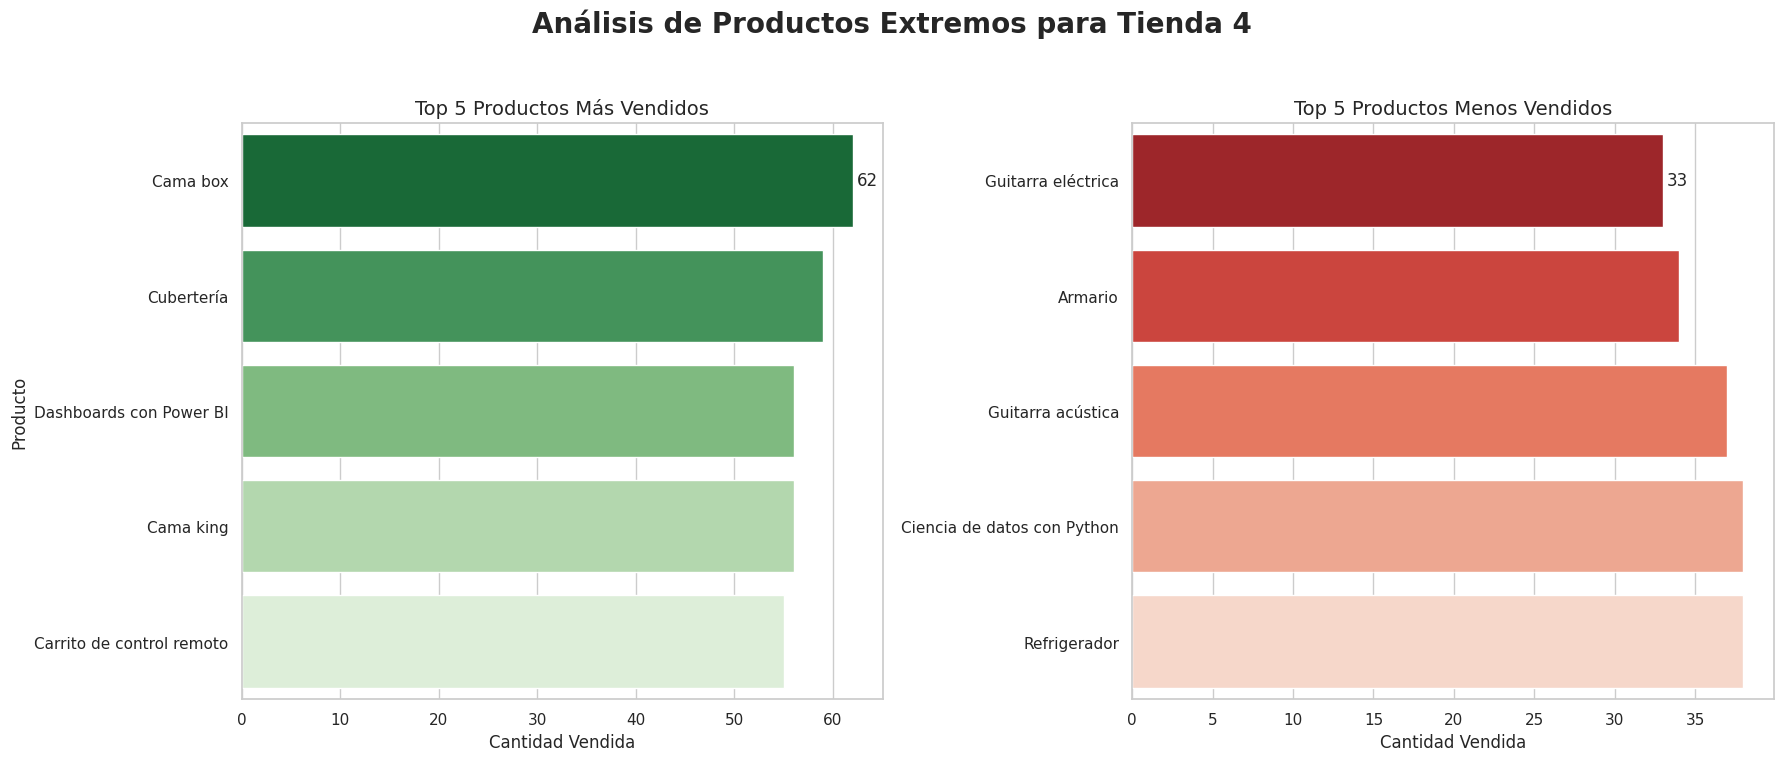

In [ ]:
def graficar_productos_extremos(df, nombre_tienda, top_n=5):
    """Función para graficar los productos más y menos vendidos de una tienda específica."""
    df_tienda = df[df['Tienda'] == nombre_tienda]
    conteo_productos = df_tienda['Producto'].value_counts()

    mas_vendidos = conteo_productos.head(top_n)
    menos_vendidos = conteo_productos.tail(top_n).sort_values(ascending=True)

    # Crear la figura y los subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(f'Análisis de Productos Extremos para {nombre_tienda}', fontsize=20, weight='bold')

    # Gráfico de productos más vendidos
    sns.barplot(x=mas_vendidos.values, y=mas_vendidos.index, ax=ax1, palette='Greens_r', hue=mas_vendidos.index, dodge=False, legend=False)
    ax1.set_title(f'Top {top_n} Productos Más Vendidos', fontsize=14)
    ax1.set_xlabel('Cantidad Vendida', fontsize=12)
    ax1.set_ylabel('Producto', fontsize=12)
    ax1.bar_label(ax1.containers[0], padding=3)

    # Gráfico de productos menos vendidos
    sns.barplot(x=menos_vendidos.values, y=menos_vendidos.index, ax=ax2, palette='Reds_r', hue=menos_vendidos.index, dodge=False, legend=False)
    ax2.set_title(f'Top {top_n} Productos Menos Vendidos', fontsize=14)
    ax2.set_xlabel('Cantidad Vendida', fontsize=12)
    ax2.set_ylabel('')
    ax2.bar_label(ax2.containers[0], padding=3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Obtener la lista de tiendas únicas
tiendas = df_consolidado['Tienda'].unique()

# Generar un gráfico para cada tienda
for tienda in sorted(tiendas):
    graficar_productos_extremos(df_consolidado, tienda)

# 5. Envío promedio por tienda
Los costos logísticos, como el envío, impactan directamente en la rentabilidad. Se analizará el costo de envío promedio para cada tienda, lo que nos ayudará a entender las diferencias en la eficiencia operativa y los costos asociados a la distribución geográfica de sus ventas.

/tmp/ipython-input-1262675114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Costo de envío', data=envio_promedio, palette='coolwarm_r', order=envio_promedio['Tienda'])


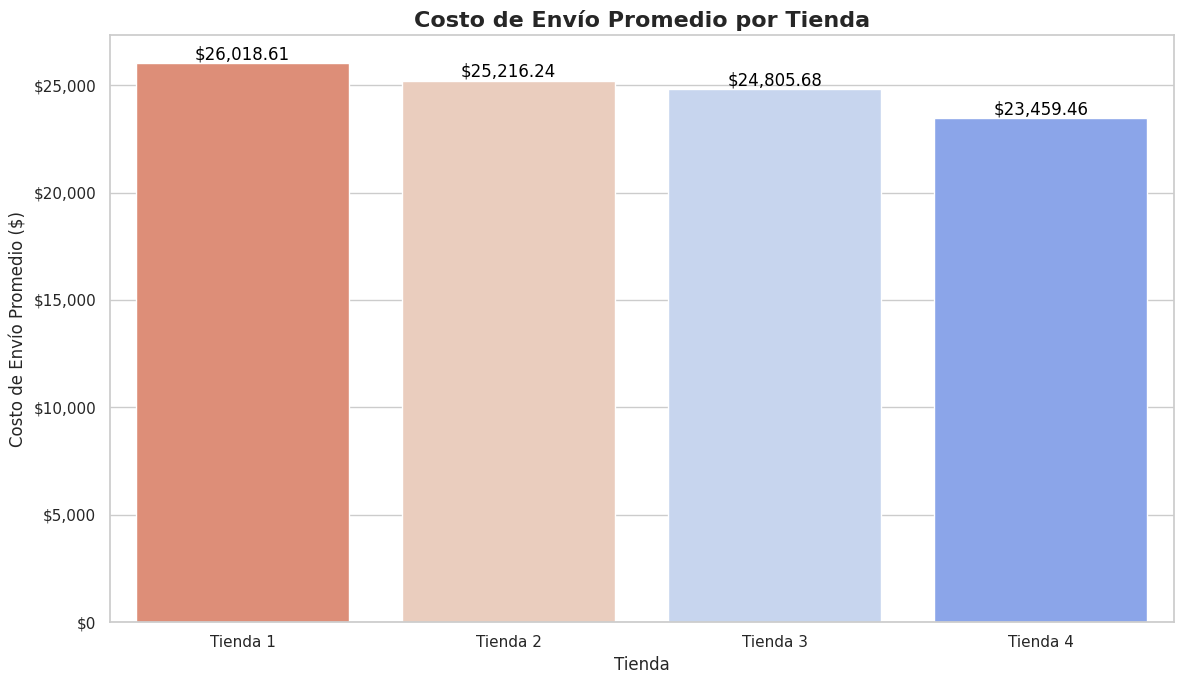

In [ ]:
# Calcular el costo de envío promedio por tienda
envio_promedio = df_consolidado.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Tienda', y='Costo de envío', data=envio_promedio, palette='coolwarm_r', order=envio_promedio['Tienda'])

# Añadir títulos y etiquetas
plt.title('Costo de Envío Promedio por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio ($)', fontsize=12)

# Formatear el eje Y para mostrar los valores en formato de moneda
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Añadir etiquetas de valor en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x:,.2f}', label_type='edge', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# 6. Desempeño geográfico
Este análisis explora la distribución geográfica de las ventas para cada tienda. Utilizando un gráfico de dispersión con las coordenadas de latitud y longitud, se visualizará si existen concentraciones geográficas de clientes por tienda. Adicionalmente, un mapa de calor mostrará el volumen de ventas por ciudad para cada tienda, revelando los mercados más importantes y las posibles superposiciones o ausencias en la cobertura geográfica.

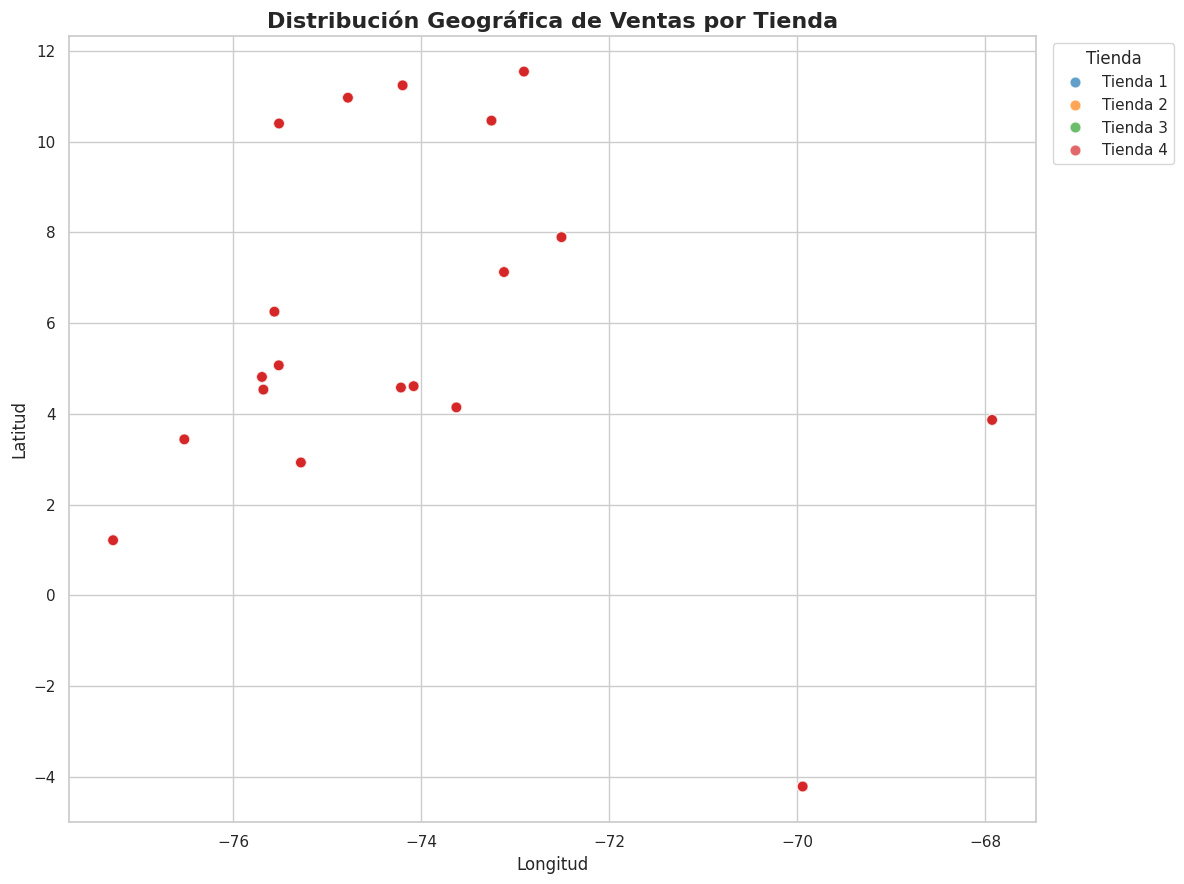

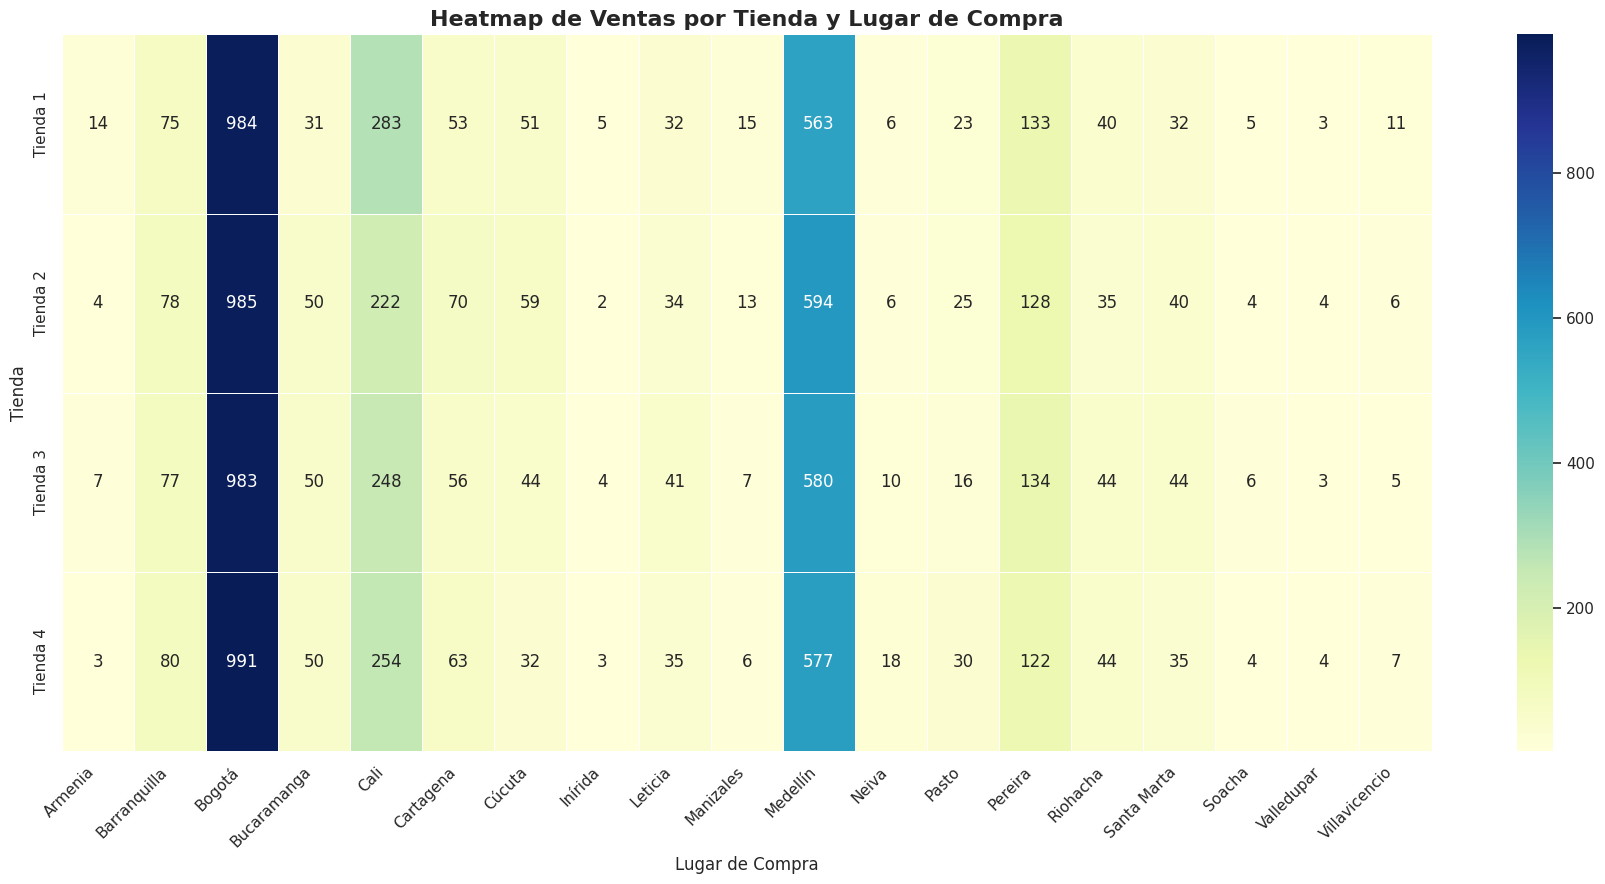

In [ ]:
# Gráfico de dispersión para visualizar la distribución geográfica de las ventas
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df_consolidado, x='lon', y='lat', hue='Tienda', alpha=0.7, s=60, palette='tab10')

# Añadir títulos y etiquetas
plt.title('Distribución Geográfica de Ventas por Tienda', fontsize=16, weight='bold')
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title='Tienda', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Crear un mapa de calor para analizar el rendimiento por lugar de compra
desempeno_geo = df_consolidado.groupby(['Tienda', 'Lugar de Compra']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 9))
sns.heatmap(desempeno_geo, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

# Añadir títulos y etiquetas
plt.title('Heatmap de Ventas por Tienda y Lugar de Compra', fontsize=16, weight='bold')
plt.xlabel('Lugar de Compra', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# INFORME FINAL

**Para:** Sr. Juan, Director de Alura Store

**De:** Departamento de Análisis de Datos

**Asunto:** Análisis de Rendimiento de Tiendas y Recomendación de Venta

### 1. Introducción
El presente informe detalla los resultados del análisis de datos realizado sobre las cuatro tiendas de la cadena Alura Store durante el período correspondiente a los datos proporcionados. El objetivo principal de este estudio es evaluar el rendimiento integral de cada tienda con base en métricas clave de ventas, satisfacción del cliente y costos operativos, para así proporcionar una recomendación fundamentada sobre cuál de las sucursales representa la mejor candidata para una posible venta, permitiéndole así al Sr. Juan tomar la decisión más estratégica para su nuevo emprendimiento.

### 2. Desarrollo del Análisis

A continuación, se presenta un resumen comparativo de los hallazgos clave para cada una de las tiendas:

**Análisis de Facturación:**
El análisis de ingresos totales es el primer indicador del rendimiento de cada tienda. Como se observa en el Gráfico 1, existe una notable diferencia en la facturación. La **Tienda 4** lidera con ingresos superiores a los 328 millones, seguida de cerca por la **Tienda 1** con 316 millones. Por otro lado, la **Tienda 2** y la **Tienda 3** muestran un rendimiento considerablemente inferior, con 287 y 282 millones respectivamente, siendo la **Tienda 3 la de menor facturación**.

**Ventas por Categoría:**
El volumen de ventas por categoría revela que `Muebles`, `Electrodomésticos` y `Electrónicos` son las categorías más fuertes en general. Sin embargo, la **Tienda 3** muestra un volumen de ventas consistentemente más bajo en casi todas las categorías en comparación con las demás, especialmente en las de alto valor como `Electrodomésticos`. Esto sugiere una menor capacidad para mover inventario o una menor penetración en mercados clave.

**Calificación Promedio de los Clientes:**
La satisfacción del cliente es un pilar fundamental. En este aspecto, la **Tienda 2** presenta la **calificación promedio más baja (3.44)**, seguida de cerca por la **Tienda 3 (3.45)**. Las tiendas 1 y 4 gozan de una mejor reputación, con promedios de 3.52 y 3.53 respectivamente. Una calificación baja, como la de la Tienda 2 y 3, puede ser un indicador de problemas en la calidad del producto, el servicio al cliente o la experiencia de compra en general, lo que representa un riesgo para la sostenibilidad a largo plazo.

**Productos Más y Menos Vendidos:**
Aunque cada tienda tiene sus propios productos estrella, un análisis detallado revela que la **Tienda 3** tiene una menor diversificación en sus productos más vendidos, y el volumen de estos sigue siendo inferior al de las tiendas con mejor rendimiento. Esto podría indicar una dependencia de pocos productos o una estrategia de inventario poco optimizada.

**Costo de Envío Promedio:**
En cuanto a la eficiencia logística, la **Tienda 3** presenta el **costo de envío promedio más elevado (32,042.89)**, superando significativamente a las demás tiendas. Un costo de envío alto puede disuadir a los compradores y reducir los márgenes de ganancia, señalando una posible ineficiencia en su cadena de suministro o una base de clientes geográficamente dispersa y costosa de atender.

**Desempeño Geográfico:**
El análisis geográfico muestra que, si bien todas las tiendas tienen una distribución de ventas a nivel nacional, la **Tienda 2** y la **Tienda 3** tienen una menor presencia en ciudades clave como Bogotá y Medellín, donde se concentra un gran volumen de ventas de las tiendas 1 y 4. Esto confirma que su alcance de mercado es más limitado o menos efectivo en las áreas de mayor potencial económico.

### 3. Conclusión y Recomendación

Tras una evaluación exhaustiva de todos los indicadores de rendimiento, se ha identificado un patrón claro de bajo desempeño en dos de las sucursales. Sin embargo, una de ellas destaca por sus deficiencias en múltiples áreas críticas.

La **Tienda 2** presenta la calificación más baja, lo cual es una señal de alerta importante. No obstante, la **Tienda 3** no solo comparte una calificación casi igual de baja, sino que además presenta:

1.  **El menor ingreso total** de las cuatro tiendas.
2.  **El costo de envío promedio más alto**, impactando negativamente su rentabilidad.
3.  Un **menor volumen de ventas** en la mayoría de las categorías de productos.

Esta combinación de baja facturación, altos costos operativos y una satisfacción del cliente deficiente la posiciona como la tienda menos eficiente y con el mayor potencial de riesgo para el negocio.

**Recomendación Final:**
Basado en la evidencia cuantitativa y los análisis presentados, **se recomienda vender la Tienda 3**. Esta decisión le permitirá al Sr. Juan desinvertir en el activo con menor rendimiento y mayor costo operativo, liberando así capital y recursos que podrán ser reinvertidos de manera más efectiva en su nuevo emprendimiento. La venta de la Tienda 3 representa la decisión más estratégica para optimizar el portafolio actual de Alura Store y asegurar una base sólida para futuros proyectos.